In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# PLOT UTILS
def comparison_hist(a, b):
    fig, ax = plt.subplots()
    ranges = (min(a.min(), b.min()), max(a.max(), b.max()))
    a_heights, a_bins = np.histogram(a, range=ranges)
    b_heights, b_bins = np.histogram(b, range=ranges, bins=a_bins)
    width = (a_bins[1] - a_bins[0])/3
    ax.bar(a_bins[:-1], a_heights, width=width, facecolor='green')
    ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='blue')
    
def comparison_scat(df, a, b):
    fig, ax = plt.subplots()
    ax.scatter(a[0], a[1], s=10, c='green', label='a')
    ax.scatter(b[0], b[1], s=10, c='blue', label='b')

# Vorstände - Gesamtdaten

Diese beinhaltet Gesamtbezüge und Anzahl Vorstände und daraus errechnetes durchschnittl. Gehalt für 2013 und 2014 (selber gesammelte Werte). Als Relationsgrößen setzen wir die Größe der Sparkasse, die wir durch die Werte Bilanzsumme, Vergebene Kredite und Anzahl Mitarbeiter errechnen, alles Werte aus dem Crowdnewsromm)

In [2]:
df = pd.read_csv('./data/jahresabschluss_kerndaten.csv')

## Von wie vielen Sparkassen haben wir diese Gehaltswerte erfasst?

In [3]:
# 2013
len(df[pd.notnull(df.gesamtbezuege_2013)].index)

282

In [4]:
# 2014
len(df[pd.notnull(df.gesamtbezuege_2014)].index)

287

## Wie entwickelten sich die Gesamtbezüge?

### 2014

In [5]:
mean_2014 = df.gesamtbezuege_2014.mean()
mean_2014

871580.86411149823

### 2013

In [6]:
mean_2013 = df.gesamtbezuege_2013.mean()
mean_2013

853871.52726950357

### Veränderung 2013 - 2014

In [7]:
# absolute
mean_2014-mean_2013

17709.336841994664

In [8]:
# percent
(mean_2014-mean_2013)/mean_2013*100

2.0740048445724959

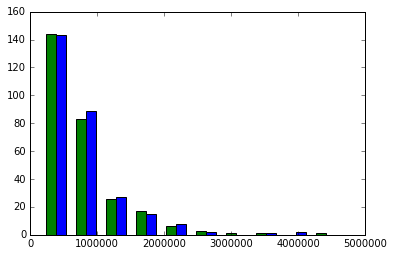

In [9]:
comparison_hist(df.gesamtbezuege_2013, df.gesamtbezuege_2014)

## Wie viel verdient ein Vorstand durchschnittlich?

In [10]:
df['durchschnittsgehalt_2014'] = df.gesamtbezuege_2014 / df.anzahl_vorstaende_2014
df['durchschnittsgehalt_2013'] = df.gesamtbezuege_2013 / df.anzahl_vorstaende_2013

### Wie groß ist die Gehaltsspanne der Durchschnittsgehälter?

In [11]:
df.durchschnittsgehalt_2014.min(), df.durchschnittsgehalt_2014.max()

(87586.206896551725, 853658.53658536589)

In [12]:
df.durchschnittsgehalt_2014.max() - df.durchschnittsgehalt_2014.min()

766072.32968881412

### Top 10: Bei diesen Sparkassen verdienen die Vorstände durchschnittlich am meisten


In [13]:
df.sort_values('durchschnittsgehalt_2014', ascending=False)[
    ['sparkasse', 'gesamtbezuege_2014', 'durchschnittsgehalt_2014', 'anzahl_vorstaende_2014']][:10]

,sparkasse,gesamtbezuege_2014,durchschnittsgehalt_2014,anzahl_vorstaende_2014
287,Hamburger Sparkasse AG,4200000.0,853658.536585,4.92
285,Kreissparkasse Köln,3521400.0,704280.000000,5.00
286,Berliner Sparkasse,3911000.0,651833.333333,6.00
278,Sparkasse Hannover,2246000.0,613661.202186,3.66
282,Frankfurter Sparkasse,2452000.0,613000.000000,4.00
280,Die Sparkasse Bremen AG,2400000.0,600000.000000,4.00
277,Sparkasse Münsterland Ost,2224000.0,556000.000000,4.00
284,Sparkasse Aachen,2724000.0,544800.000000,5.00
263,Stadt- und Kreissparkasse Leipzig,1627000.0,542333.333333,3.00
262,Kreissparkasse Ludwigsburg,1607000.0,535666.666667,3.00


## Vorstands-Durchschnittsgehalt im Zusammenhang mit...

### Bemessungsgrundlage

In [14]:
df['bemessung_2014'] = df.bilanzsumme_2014 + df.eigenkapital_2014*10 + df.vergebene_kredite_2014
df['bemessung_2013'] = df.bilanzsumme_2013 + df.eigenkapital_2013*10 + df.vergebene_kredite_2013

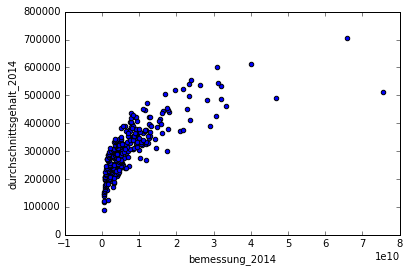

In [15]:
df.plot.scatter('bemessung_2014', 'durchschnittsgehalt_2014')

### Mitarbeiteranzahl

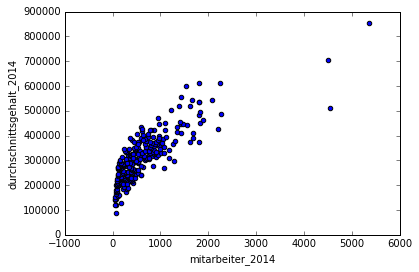

In [16]:
df[df.mitarbeiter_2014 > df.mitarbeiter_2014.min()].plot.scatter('mitarbeiter_2014', 'durchschnittsgehalt_2014')

### Jahresüberschuss

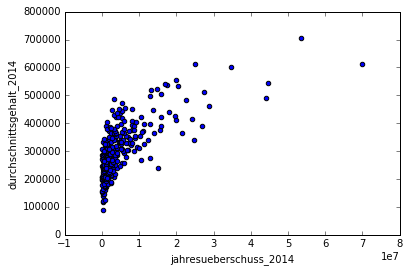

In [17]:
df[(df.jahresueberschuss_2014 > 0) & (df.durchschnittsgehalt_2014 > 0)].plot.scatter('jahresueberschuss_2014', 'durchschnittsgehalt_2014')

### Löhne & Gehälter gesamt

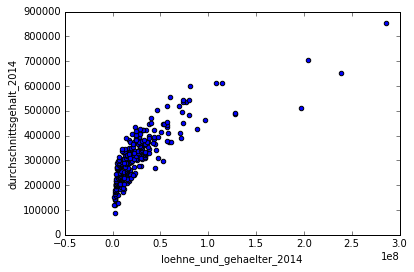

In [18]:
df.plot.scatter('loehne_und_gehaelter_2014', 'durchschnittsgehalt_2014')

### Löhne & Gehälter (Mitarbeiter) Durchschnitt

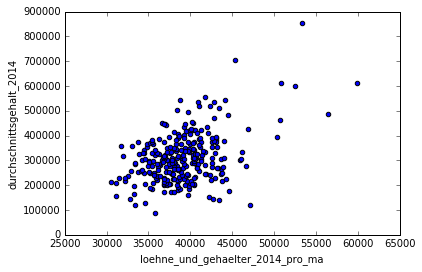

In [19]:
df['loehne_und_gehaelter_2014_pro_ma'] = df.loehne_und_gehaelter_2014/df.mitarbeiter_2014
df[df.loehne_und_gehaelter_2014_pro_ma < df.loehne_und_gehaelter_2014_pro_ma.max()].plot.scatter('loehne_und_gehaelter_2014_pro_ma', 'durchschnittsgehalt_2014')

## Bundesland-Vergleich

In [20]:
# weighted avg by 'bemessung' via groupby:
df['durchschnittsgehalt_wt_2014'] = df.durchschnittsgehalt_2014*df.bemessung_2014
df['durchschnittsgehalt_wt_2013'] = df.durchschnittsgehalt_2013*df.bemessung_2013
df['anzahl_beruecksichtigt'] = df.durchschnittsgehalt_wt_2014.map(lambda x: 1 if x > 0 else 0)
df['anzahl_gesamt'] = 1
df_states = df.groupby('state', as_index=False).sum()
df_states['durchschnittsgehalt_2014_wt'] = df_states.durchschnittsgehalt_wt_2014/df_states.bemessung_2014
df_states['durchschnittsgehalt_2013_wt'] = df_states.durchschnittsgehalt_wt_2013/df_states.bemessung_2013
df_states['daten_abdeckung'] = df_states.anzahl_beruecksichtigt / df_states.anzahl_gesamt
df_states[['state', 'durchschnittsgehalt_2014_wt', 'anzahl_beruecksichtigt', 'anzahl_gesamt', 'daten_abdeckung']].sort_values('durchschnittsgehalt_2014_wt', ascending=False)

,state,durchschnittsgehalt_2014_wt,anzahl_beruecksichtigt,anzahl_gesamt,daten_abdeckung
4,Bremen,600000.000000,1,1,1.000000
9,Nordrhein-Westfalen,436309.231269,103,105,0.980952
12,Sachsen,406400.837141,8,12,0.666667
6,Hessen,343858.582904,33,34,0.970588
1,Bayern,338945.830777,64,71,0.901408
11,Saarland,281674.431302,7,7,1.000000
15,Thüringen,246175.923204,16,16,1.000000
3,Brandenburg,238161.020762,4,11,0.363636
14,Schleswig-Holstein,216069.989438,8,13,0.615385
8,Niedersachsen,178903.484197,7,46,0.152174


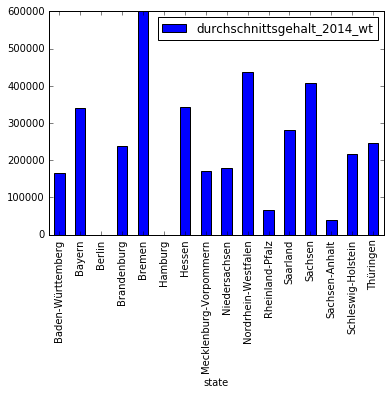

In [21]:
df_states.plot.bar('state', 'durchschnittsgehalt_2014_wt')

## Ost-West

In [22]:
# get region
df['region'] = df.verband.map(lambda x: 'ost' if x == 'OSV' else 'west')

# weighted avg by 'bemessung' via groupby:
df_region = df.groupby('region', as_index=False).sum()
df_region['durchschnittsgehalt_2014_wt'] = df_region.durchschnittsgehalt_wt_2014/df_region.bemessung_2014
df_region['durchschnittsgehalt_2013_wt'] = df_region.durchschnittsgehalt_wt_2013/df_region.bemessung_2013
df_region[['region', 'durchschnittsgehalt_2014_wt']]

,region,durchschnittsgehalt_2014_wt
0,ost,259900.208195
1,west,298003.415493


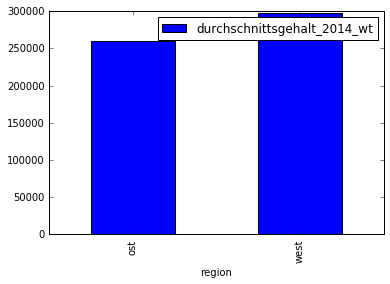

In [23]:
df_region.plot.bar('region', 'durchschnittsgehalt_2014_wt')

### absoluter Unterschied Ost-West

In [24]:
df_region['durchschnittsgehalt_2014_wt'][1] - df_region['durchschnittsgehalt_2014_wt'][0]

38103.207297443354

## Exkurs: Was verdienen die Mitarbeiter?

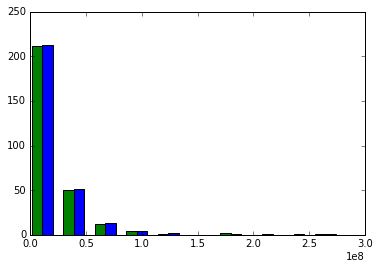

In [25]:
df['mitarbeitergehaelter_2014'] = df.loehne_und_gehaelter_2014-df.gesamtbezuege_2014
df['mitarbeitergehaelter_2013'] = df.loehne_und_gehaelter_2013-df.gesamtbezuege_2013

comparison_hist(df.mitarbeitergehaelter_2013, df.mitarbeitergehaelter_2014)

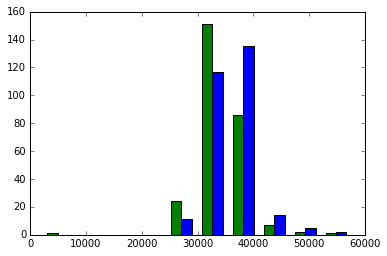

In [26]:
df['mitarbeiter_durchschnitt_2014'] = df.mitarbeitergehaelter_2014/df.mitarbeiter_2014
df['mitarbeiter_durchschnitt_2013'] = df.mitarbeitergehaelter_2013/df.mitarbeiter_2013

# fix some data errors on the edges
df = df[df.mitarbeiter_durchschnitt_2014 < df.mitarbeiter_durchschnitt_2014.max()]
df = df[df.mitarbeiter_durchschnitt_2014 > df.mitarbeiter_durchschnitt_2014.min()]

comparison_hist(df.mitarbeiter_durchschnitt_2013, df.mitarbeiter_durchschnitt_2014)

**Prozentualer Anstieg des durchschnittlichen Mitarbeitergehalts 2013 zu 2014**

In [27]:
(df.mitarbeitergehaelter_2014.mean()-df.mitarbeitergehaelter_2013.mean())/df.mitarbeitergehaelter_2013.mean()*100

2.4788959460415607